In [60]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Cargamos los datos
df = pd.read_csv('./hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [63]:
# cambio los tipos de datos a categorico y string
df['agent'] = df['agent'].astype("category")
df['company'] = df['company'].astype(str)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  object  
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  object  
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119386 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

In [65]:
df.shape

(119390, 32)

In [66]:
cardinalidad = pd.DataFrame({'Cantidad' : df.nunique(), 'Porcentaje' : (df.nunique()) / (df.shape[0]) * (100)})
# Calcula la cardinalidad de cada columna en el DataFrame df.
# Utiliza el método nunique() para contar la cantidad de valores únicos en cada columna.
# El resultado se almacena en la columna 'Cantidad' del DataFrame cardinalidad.

# Calcula el porcentaje de valores únicos en relación al total de filas del DataFrame.
# Divide la cantidad de valores únicos por el número total de filas (df.shape[0]) y luego multiplica por 100 para obtener el porcentaje.
# El resultado se almacena en la columna 'Porcentaje' del DataFrame cardinalidad.
cardinalidad.round(5)


,Cantidad,Porcentaje
hotel,2,0.00168
is_canceled,2,0.00168
lead_time,479,0.40121
arrival_date_year,3,0.00251
arrival_date_month,12,0.01005
arrival_date_week_number,53,0.04439
arrival_date_day_of_month,31,0.02597
stays_in_weekend_nights,17,0.01424
stays_in_week_nights,35,0.02932
adults,14,0.01173


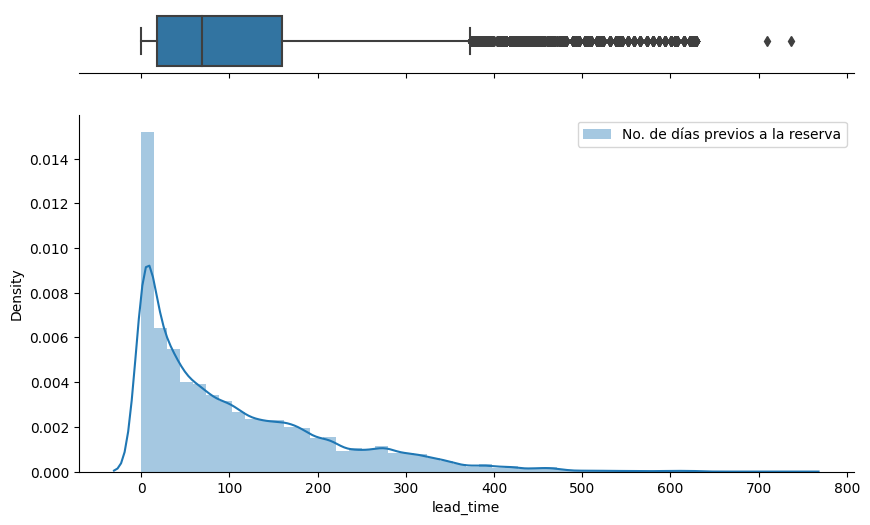

In [67]:
import warnings
warnings.filterwarnings("ignore")

# Crear una figura con dos subgráficos, uno para el boxplot y otro para la distribución
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})

# Graficar el diagrama de caja (boxplot) de la columna 'lead_time'
sns.boxplot(df['lead_time'], ax=ax_box, orient="h")
# Utiliza el método boxplot() de seaborn (sns) para graficar el diagrama de caja de la columna 'lead_time' del 
# DataFrame df.
# El parámetro ax=ax_box se utiliza para indicar el subgráfico donde se va a mostrar el diagrama de caja.
# El parámetro orient="h" se establece para que el diagrama de caja se muestre horizontalmente.

# Graficar la distribución de la columna 'lead_time'
sns.distplot(df['lead_time'], ax=ax_hist, label='No. de días previos a la reserva')
# Utiliza el método distplot() de seaborn (sns) para graficar la distribución de la columna 'lead_time' del DataFrame df.
# El parámetro ax=ax_hist se utiliza para indicar el subgráfico donde se va a mostrar la distribución.
# El parámetro label='No. de días previos a la reserva' se utiliza para establecer la etiqueta de la distribución en 
# el gráfico.

# Establecer las propiedades de los ejes
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

# Agregar leyenda al gráfico de distribución
ax_hist.legend()


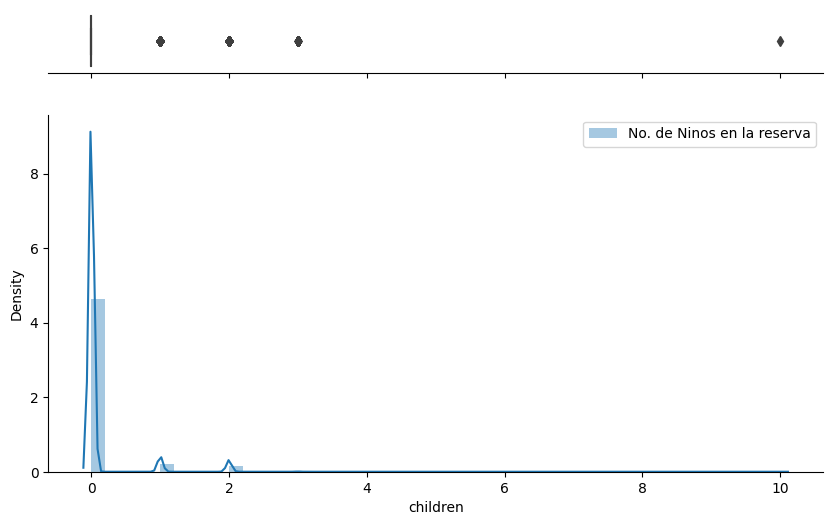

In [68]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['children'], ax=ax_box, orient="h")
# Graficar el diagrama de caja (boxplot) de la columna 'children'
# Utiliza el método boxplot() de seaborn (sns) para graficar el diagrama de caja de la columna 'children' del DataFrame df.
# El parámetro ax=ax_box se utiliza para indicar el subgráfico donde se va a mostrar el diagrama de caja.
# El parámetro orient="h" se establece para que el diagrama de caja se muestre horizontalmente.

sns.distplot(df['children'], ax=ax_hist, label='No. de Ninos en la reserva')
# Graficar la distribución de la columna 'children'
# Utiliza el método distplot() de seaborn (sns) para graficar la distribución de la columna 'children' del DataFrame df.
# El parámetro ax=ax_hist se utiliza para indicar el subgráfico donde se va a mostrar la distribución.
# El parámetro label='No. de Ninos en la reserva' se utiliza para establecer la etiqueta de la distribución en el gráfico.

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

ax_hist.legend()


In [70]:
# variable objetivo Adult-->Integer	Number of adults


# Calculamos el z-score
df['adults_z'] = df['adults'] - df['adults'].mean()/df['adults'].std()
# Creamos una variable para marcar los outliers
df['adults_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['adults_z']>3)|(df['adults_z']<-3) , 'adults_outliers'] = 1
# Veamos los resultados
df[['adults', 'adults_z','adults_outliers']]


,adults,adults_z,adults_outliers
0,2,-1.204779,0
1,2,-1.204779,0
2,1,-2.204779,0
3,1,-2.204779,0
4,2,-1.204779,0
...,...,...,...
119385,2,-1.204779,0
119386,3,-0.204779,0
119387,2,-1.204779,0
119388,2,-1.204779,0


In [71]:
# Veamos los casos marcados
df['adults_outliers'].value_counts()

0    118974
1       416
Name: adults_outliers, dtype: int64

In [72]:
df['children_z'] = df['children'] - df['children'].mean()/df['children'].std()
df['children_outliers'] = 0
df.loc[(df['children_z']>3)|(df['children_z']<-3) , 'children_outliers'] = 1
df[['children', 'children_z','children_outliers']]


,children,children_z,children_outliers
0,0.0,-0.260662,0
1,0.0,-0.260662,0
2,0.0,-0.260662,0
3,0.0,-0.260662,0
4,0.0,-0.260662,0
...,...,...,...
119385,0.0,-0.260662,0
119386,0.0,-0.260662,0
119387,0.0,-0.260662,0
119388,0.0,-0.260662,0


In [73]:
df['children_outliers'].value_counts()

0    119389
1         1
Name: children_outliers, dtype: int64

In [74]:
df["children"][df["children_outliers"]==1]

328    10.0
Name: children, dtype: float64

In [75]:
nulos = pd.DataFrame({'Cantidad' : df.isnull().sum(), 'Porcentaje' : (df.isnull().sum()) / (len(df)) * (100)})
nulos

,Cantidad,Porcentaje
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [76]:
df.children.describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [77]:
df['children'] = df['children'].astype("category")
df.children.describe(include="category")

count     119386.0
unique         5.0
top            0.0
freq      110796.0
Name: children, dtype: float64

In [78]:
df.children.plot.hist()

TypeError: no numeric data to plot

In [79]:
df['children'] = df['children'].astype(int)
df.children.plot.hist(bins=10)

ValueError: Cannot convert float NaN to integer

In [80]:
# Imputamos esta variable con la moda
df['children'].fillna(df['children'].mode()[0], inplace = True)

In [81]:
# Validemos si se realizó la imputación sobre la variable
df.children.isnull().sum()

0

<Axes: ylabel='Frequency'>

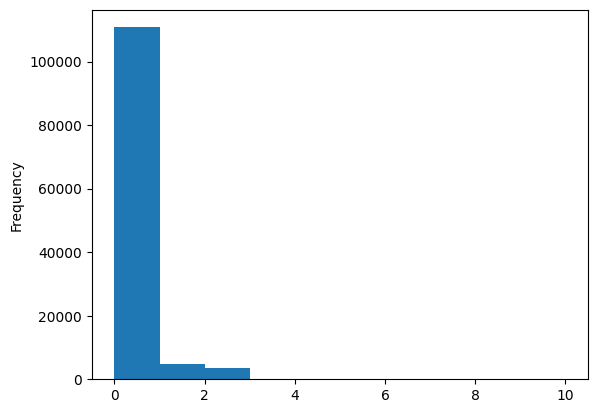

In [83]:
df['children'] = df['children'].astype(int)
df.children.plot.hist(bins=10)  

In [84]:
round(df.children.value_counts(normalize=True)*100,1)

0     92.8
1      4.1
2      3.1
3      0.1
10     0.0
Name: children, dtype: float64

In [85]:
df.country.value_counts(normalize=True)*100

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
         ...    
DJI     0.000841
BWA     0.000841
HND     0.000841
VGB     0.000841
NAM     0.000841
Name: country, Length: 177, dtype: float64

In [86]:
# Imputamos esta variable con la moda
df['country'].fillna(df['country'].mode()[0], inplace = True)

In [87]:
# Validemos si se realizó la imputación sobre la variable
df.country.isnull().sum()

0

In [88]:
import pandas as pd
import numpy as np

# Crear un DataFrame con valores faltantes
df_ejemplo = pd.DataFrame({'columna1': ["hola", "pera ", 8, 4, 10,"", 7, 8, 9]})

# Utilizar el método isnull() para detectar los valores faltantes

valores_faltantes = df_ejemplo['columna1'].isnull().sum()

f"Tenemos un total de {valores_faltantes} valores faltantes de un total de {len(df_ejemplo)}"



'Tenemos un total de 0 valores faltantes de un total de 9'

In [89]:
df_ejemplo
# se observa en el indice 5 como falta dato, que al ser una cadena de texto no lo reconoce como NaN

,columna1
0,hola
1,pera
2,8
3,4
4,10
5,
6,7
7,8
8,9


In [90]:
# lo mejor es cambiar ese espacio vacio por np.nan

df_ejemplo.replace("", np.nan, True)
valores_faltantes = df_ejemplo['columna1'].isnull().sum()
print(f"Tenemos un total de {valores_faltantes} valor faltante de un total de {len(df_ejemplo)}")
df_ejemplo

Tenemos un total de 1 valor faltante de un total de 9


,columna1
0,hola
1,pera
2,8
3,4
4,10
5,NaN
6,7
7,8
8,9


In [91]:
df_ejemplo.dropna(inplace=True)
df_ejemplo



,columna1
0,hola
1,pera
2,8
3,4
4,10
6,7
7,8
8,9


In [92]:
df_ejemplo = df_ejemplo.reset_index(drop=True)
df_ejemplo

,columna1
0,hola
1,pera
2,8
3,4
4,10
5,7
6,8
7,9


In [95]:
df[(df.children == 0) & (df.adults == 0)].shape[0]

180

In [94]:
# Veamos el tamaño del dataframe
df.shape

(119390, 36)

In [96]:
# Eliminaremos los registros que no tienen sentido de negocio
df.drop(df[(df.children==0) & (df.adults==0)].index, inplace=True)

In [98]:
# Validemos que quedo bien
df.shape

(119210, 36)

In [99]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
# tomemos unicamente las variables númericas
df_2 = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [102]:
# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA

In [103]:
# Creamos la instancia del modelo
modelo_pca = PCA(n_components=4)

# Entrenamos el modelo con nuestros datos
modelo_pca.fit(df_2)

PCA(n_components=4)

In [104]:
# Empecemos por los componentes
# para esto usamos .components_
# vamos a guardar esta información en un dataframe, para poderlo ver más facilmente
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = df_2.columns, index=lista_componentes)
componentes

,sepal_length,sepal_width,petal_length,petal_width
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481
PC3,-0.582030,0.597911,0.076236,0.545831
PC4,-0.315487,0.319723,0.479839,-0.753657


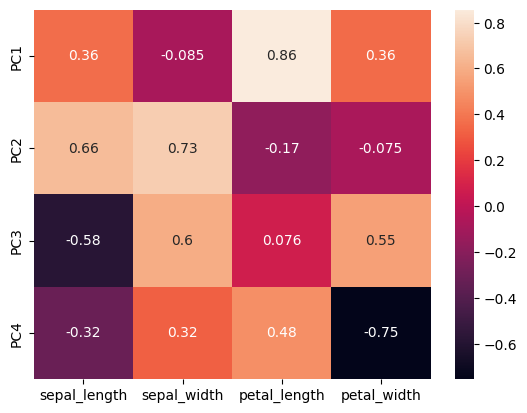

In [105]:
# practiquemos con gráficos, nos ayudan a entender mejor la información
ax = sns.heatmap(componentes, annot=True)

In [106]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(2))

['PC1', 'PC2', 'PC3', 'PC4']
[0.92 0.05 0.02 0.01]


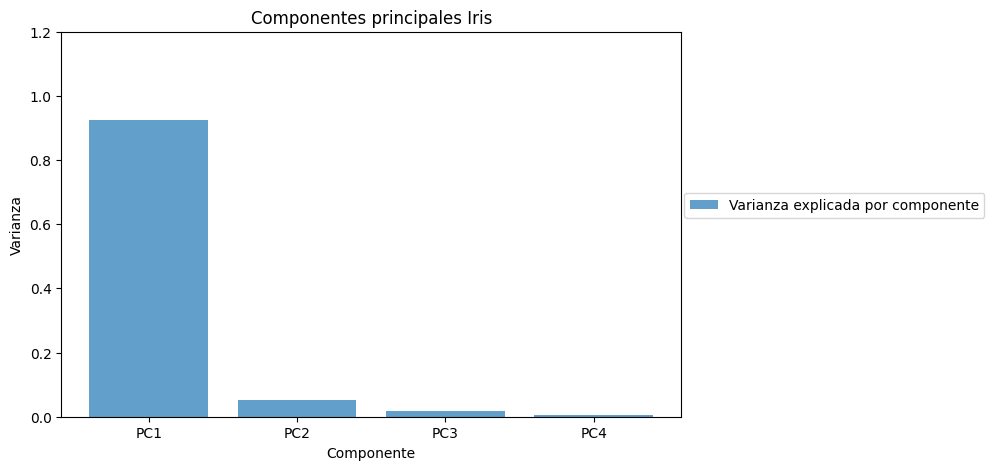

In [107]:
# Practiquemos con gráficos, nos ayudan a entender mejor la información
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(lista_componentes, modelo_pca.explained_variance_ratio_, alpha=0.7, label='Varianza explicada por componente')


ax.set_title('Componentes principales Iris')
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza')
ax.set_ylim(0, 1.2)
ax.legend(bbox_to_anchor = (1.5, 0.6))

In [108]:
# cuando utilizamos .transform estamos calculando la función para cada dato y generando el resultado
# luego lo guardamos en un dataframe para poder utilizarlo más facilmente
proyecciones = pd.DataFrame(modelo_pca.transform(df_2), index=df_2.index,columns=lista_componentes)
proyecciones

,PC1,PC2,PC3,PC4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [109]:
proyecciones.drop(columns=['PC3', 'PC4'], inplace=True)

In [110]:
proyecciones

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [111]:
# Agreguemos la columna de las especies para poderla utilizar más adelante
proyecciones['species'] = df['species'] # Esto solo funciona por que tienen el mismo index
proyecciones

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


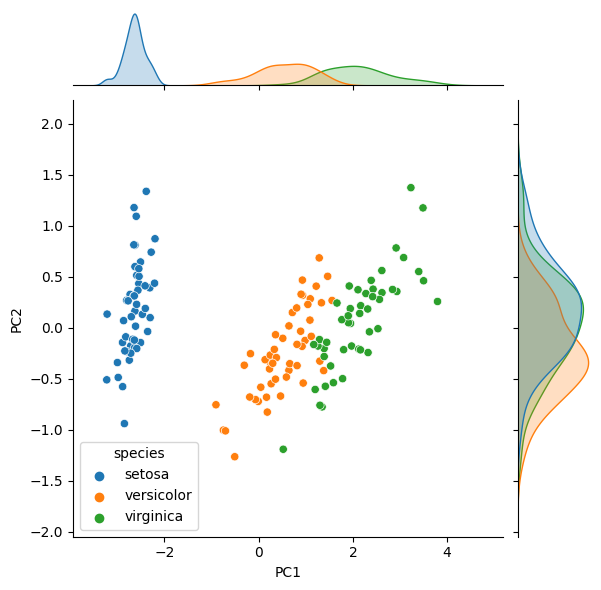

In [112]:
# Practiquemos con un gráfico de seaborn, así podremos ver la distribución y la relación entre las componentes 1 y 2
g = sns.jointplot(x='PC1', y='PC2', data=proyecciones, hue="species", palette="tab10")
g.fig.set_figwidth(6)

#La función jointplot crea un gráfico en el que se muestra la distribución de los valores de dos variables en
#forma de histogramas, y también traza una gráfica de dispersión para mostrar la relación entre ambas variables.